# Analyis of Turbulence Data

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
label_size = 18
plt.rcParams.update(
    {
        "font.size": label_size,
        "legend.title_fontsize": label_size,
        "legend.fontsize": label_size,
        "axes.labelsize": label_size,
        "xtick.labelsize": label_size,
        "ytick.labelsize": label_size,
        "axes.labelpad": 4,
        # "lines.markersize": 13,
        "lines.linewidth": 2,
    }
)

Exercise 5

In [2]:
data = np.loadtxt('Data/k10mf_processed_FD2.txt')

5.1) Calculate mean $u_{mean}  = \langle u \rangle$ and standard deviation $u_{std} = \sqrt{\langle u^2 \rangle - (\langle u \rangle)^2}$

In [3]:
# Sample frequency 20 kHz
f_s = 20_000
T = len(data)/f_s
print(f'The dataset is is {T}s long.')

# Mean and standard deviation
u_mean = np.mean(data)
u_std = np.std(data)

The dataset is is 62.88915s long.


The mean velocity is 6.39m/s.
The standard deviation is +/- 0.16m/s.


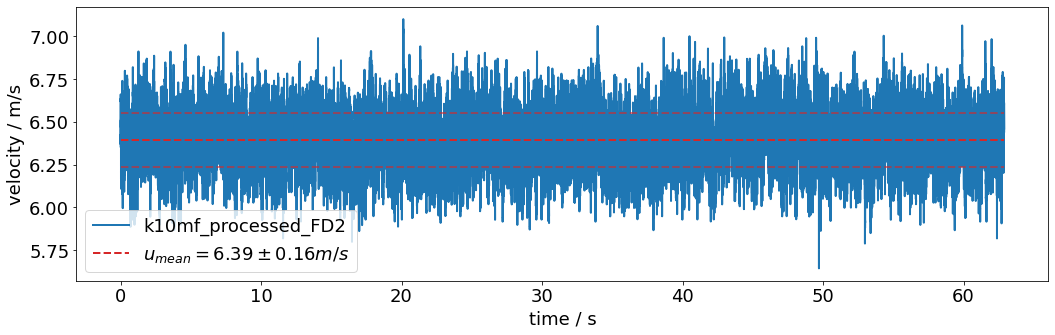

In [4]:
fig, ax = plt.subplots(figsize=(15,5), tight_layout=True)
time = np.linspace(0,T,len(data))
ax.plot(time, data, label='k10mf_processed_FD2', zorder=1)

# Plot time series and mean +/- std velocity
print(f'The mean velocity is {u_mean:.2f}m/s.\nThe standard deviation is +/- {u_std:.2f}m/s.')
ax.hlines(u_mean, 0, T, colors='C3', linestyles='--', zorder=2, label=f'$u_{{mean}}={{{u_mean:.2f}}} \pm {{{u_std:.2f}}} m/s$')
ax.hlines(u_mean+u_std, 0, T, colors='C3', linestyles='--', zorder=2, alpha=0.6)
ax.hlines(u_mean-u_std, 0, T, colors='C3', linestyles='--', zorder=2, alpha=0.6)

ax.set_xlabel('time / s')
ax.set_ylabel('velocity / m/s')
ax.legend()
fig.savefig('Abb/Velocity_Time_Series.png')

### 5.2) Use Taylor's hypothesis $x = u_{mean} \cdot t$ to calculate a spatial series from a temporal series
Essentially, you assume that the velocity field you record at one spatial position over time only gets advected but not deformed by the mean velocity.

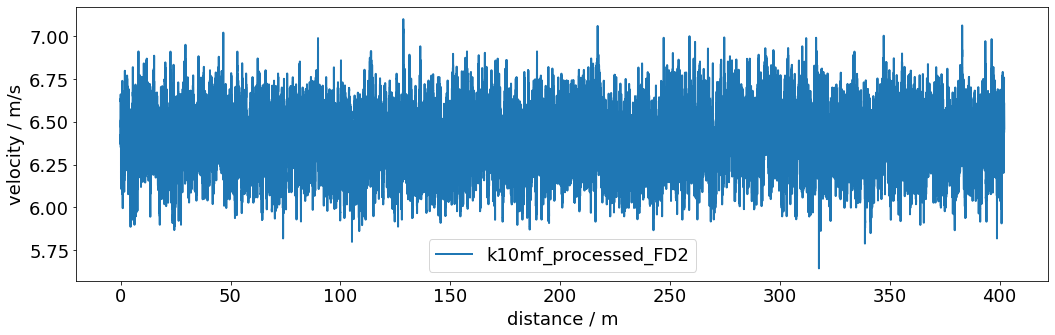

In [6]:
fig, ax = plt.subplots(figsize=(15,5), tight_layout=True)
spatial = time * u_mean
ax.plot(spatial, data, label='k10mf_processed_FD2', zorder=1)
ax.set_xlabel('distance / m')
ax.set_ylabel('velocity / m/s')
ax.legend()
fig.savefig('Abb/Velocity_Spatial_Series.png')

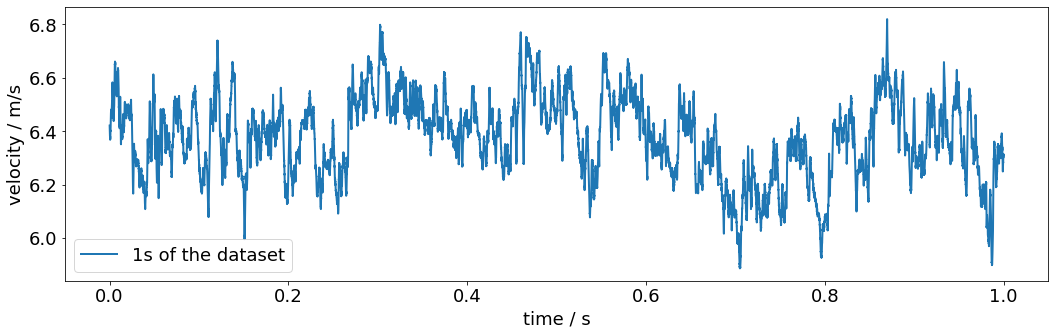

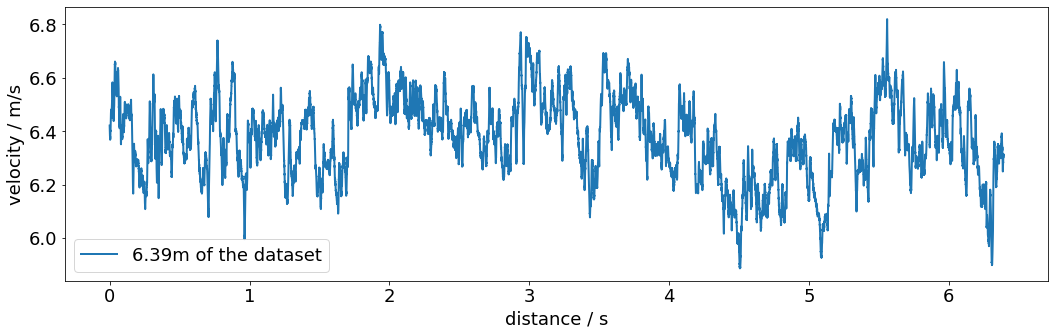

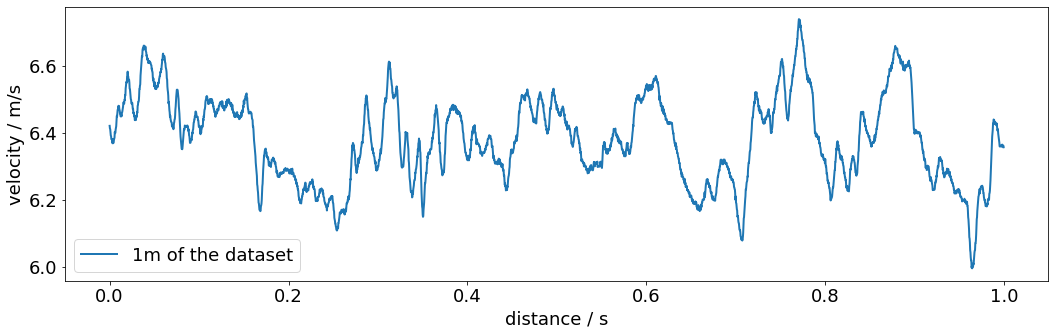

In [7]:
fig, ax = plt.subplots(figsize=(15,5), tight_layout=True)
ax.plot(time[:f_s], data[:f_s], label='1s of the dataset', zorder=1)
ax.set_xlabel('time / s')
ax.set_ylabel('velocity / m/s')
ax.legend()

fig, ax = plt.subplots(figsize=(15,5), tight_layout=True)
ax.plot(spatial[:f_s], data[:f_s], label=f'{u_mean:.2f}m of the dataset', zorder=1)
ax.set_xlabel('distance / s')
ax.set_ylabel('velocity / m/s')
ax.legend()

fig, ax = plt.subplots(figsize=(15,5), tight_layout=True)
ax.plot(spatial[:int(f_s/u_mean)], data[:int(f_s/u_mean)], label='1m of the dataset', zorder=1)
ax.set_xlabel('distance / s')
ax.set_ylabel('velocity / m/s')
ax.legend()

5.3) Calculate correlation function $C(r) = \langle u'(x+r)u'(x) \rangle$ of the fluctuations $u' = u - \langle u \rangle$

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.95490634, 0.96168971, 0.96826943, 0.97452135, 0.98034977,
        0.98563867, 0.99022131, 0.99398744, 0.99680461, 0.99855139,
        1.        , 0.99855139, 0.99680461, 0.99398744, 0.99022131,
        0.98563867, 0.98034977, 0.97452135, 0.96826943, 0.96168971,
        0.95490634]),
 <matplotlib.lines.Line2D at 0x132d7148ac0>)

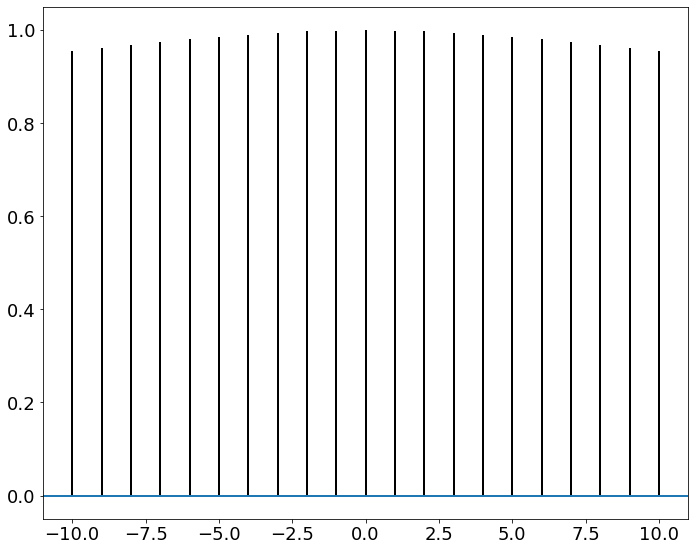

In [8]:
fig, ax = plt.subplots(figsize=(10,8), tight_layout=True)
data_fluct = data - u_mean
ax.acorr(data_fluct[:f_s])

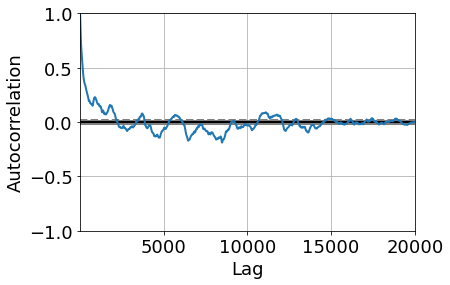

In [12]:
x = pd.plotting.autocorrelation_plot(data[:f_s])